**Cours Humanités numériques spatialisées - Master HNC de PSL**


Traitement, enrichissement et cartographie de données tabulaires issues de l'Annuaire de propriétaires et de propriétés de Paris (1898).

**Objectifs**:
- utilisation de la bibliothèque pandas et geopandas pour la manipulation des données structurées (format tableur)
- geocodage des adresses (françaises) via l'API Adresse.gouv  
- cartographie des adresses et quartiers parisiens
- utiliser des opérations spatiales

*Notebook Carto tableur adresses parisiennes © 2023 by Carmen Brando is licensed under CC BY-NC-SA 4.0*


###**Présentation du contexte**

*Développement d'une chaine de traitement pour l'analyse de l'Annuaire des propriétaires et des propriétés de Paris et du département de la Seine (1898, 1903, 1913, 1923, 1951)*

Les annuaires et les répertoires anciens constituent une source riche d’information sur un moment précis de la géographie des villes historiques, mettant en rapport la distribution de l’espace avec des données socio-économiques ou professionnelles. L’un des plus célèbres parmi eux, l’Annuaire-Almanach du commerce Didot-Bottin est désormais accessible sur Gallica. Mais il existe d’autres annuaires socioprofessionnels ou mondains (comme Tout-Paris, Paris-mondain) qui restent enfouis dans les collections des bibliothèques sans avoir été jusqu’ici exploités dans leur intégralité. Nous nous intéressons à ce type de sources et souhaite particulièrement rendre accessible et interrogeable l’Annuaire des propriétaires et des propriétés de Paris et du département de la Seine, une publication annuelle active entre 1894 et 1937 et qui a repris après la guerre.


image source : https://paris-timemachine.huma-num.fr/web/wp-content/uploads/2019/08/image_annuaire_1909_details-1024x438.png


La masse  de données à récupérer (environ 40 000 propriétaires par volume) impose de travailler avec un système d’extraction d’information capable de structurer les ressources numérisées à l’aide d’un modèle d’apprentissage automatique. Nous avons développé donc une chaîne de traitement et d’analyse numérique de annuaire.

**Pourquoi ?**

En collaboration avec un historien en sciences économiques et expert en Histoire économique du patrimoine et des inégalités, nous nous intéressons au classement des immeubles de la capitale ainsi qu’à propriétaires. Nous nous efforçons de quantifier les immeubles selon qu’ils appartiennent à des particuliers, des sociétés, des multipropriétaires, mais aussi à étudier la distribution spatiale entre domicile des propriétaires et adresses des propriétés.

Références bibliographiques:
Cura, R. , Dumenieu, B., Abadie, N., Costes, B., Perret, J., Gribaudi, M. (2018). Historical collaborative geocoding. ISPRS International Journal of Geo-Information. https://arxiv.org/abs/1703.07138

* Di Lenardo, I., Barman, R., Descombes, A., Kaplan F. (2019). Repopulating Paris: massive extraction of 4 Million addresses from city directories between 1839 and 1922, Digital Humanities conference DH2019, Utrecht, Pays-Bas, https://dev.clariah.nl/files/dh2019/boa/0878.html

* Khemakhem, M., Brando, C., Romary, L., Mélanie-Becquet, F., Pinol, J.-L. (2018). Fueling Time Machine: Information Extraction from Retro-Digitised Address Directories. JADH2018 “Leveraging Open Data”, Sep 2018, Tokyo, Japan. https://hal.archives-ouvertes.fr/hal-01814189

* Pinol, J.-L. (2009). Les atouts des systèmes d’information géographique – (SIG) pour « faire de l’histoire » (urbaine). Histoire urbaine, 26(3), 139-158. doi:10.3917/rhu.026.0139.

###Installation et initialisation

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import os

In [ ]:
!git clone https://github.com/PSIG-EHESS/TAIS.git

fatal: destination path 'TAIS' already exists and is not an empty directory.


###Importation des données tableur dans un dataframe : prendre connaissance des données

In [ ]:
csv_folder = "TAIS/donnees/ptm/"
df_1898 = pd.read_csv(csv_folder + "ptm_1898_augmentee.csv")
print("1898:" + str(len(df_1898)))
print(list(df_1898))


<ipython-input-6-0dc798b26b51>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1898 = pd.read_csv(csv_folder + "ptm_1898_augmentee.csv")


1898:82978
['nOrder', 'num_voie', 'code_voie', 'code_voie_quartier', 'nom_voie', 'type_voie', 'quartiers', 'voie_fantome', 'lettre', 'pdf', 'pagination', 'NUM', 'NUM_GLOB', 'PART', 'PERS', 'ORG', 'STATUT', 'VILLE', 'VOIE', 'RUE', 'NUM_PERS', 'GER', 'LOC', 'SPATIAL', 'Liste_imm', 'Nb_imm']


In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
from IPython.display import display, HTML
display(df_1898)

nOrder  num_voie code_voie         code_voie_quartier  nom_voie  \
0           2       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
1           3       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
2           4       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
3           5       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
4           6       2.0       A.2  A.2 ABBAYE (Rue de l') 24    ABBAYE   
...       ...       ...       ...                        ...       ...   
82973   82975       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82974   82976       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82975   82977       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82976   82978       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   
82977   82979       1.0       Z.1      Z.1 ZACHARIE (Rue) 20  ZACHARIE   

      type_voie quartiers voie_fantome lettre    pdf  pagination    NUM  \
0           rue        24          NaN      A    1.0       517.0      1   
1           rue        24          NaN      A    1.0       517.0  3 à 7   
2           rue        24          NaN      A    1.0       517.0  11-13   
3           rue        24          NaN      A    1.0       517.0  17-19   
4           rue        24          NaN      A    1.0       517.0      2   
...         ...       ...          ...    ...    ...         ...    ...   
82973       rue        20          NaN      Z  915.0      1431.0     16   
82974       rue        20          NaN      Z  915.0      1431.0     18   
82975       rue        20          NaN      Z  915.0      1431.0     20   
82976       rue        20          NaN      Z  915.0      1431.0     22   
82977       rue        20          NaN      Z  915.0      1431.0     24   

       NUM_GLOB PART                  PERS  ORG STATUT           VILLE VOIE  \
0           NaN  NaN                   NaN  NaN    NaN             NaN  NaN   
1           NaN  NaN         Laguibourgère  NaN  C. de           Paris  pl.   
2           NaN  NaN               Vallois  NaN    NaN           Paris   r.   
3           NaN  NaN                   NaN  NaN    NaN             NaN  NaN   
4           NaN  NaN                   NaN  NaN    NaN             NaN  NaN   
...         ...  ...                   ...  ...    ...             ...  ...   
82973       NaN  NaN              Vangasse  NaN    NaN           Paris   r.   
82974       NaN  NaN                Renaud  NaN    NaN           Paris   r.   
82975       NaN  NaN                Rousse  NaN    NaN  Vne-St-Hilaire   r.   
82976       NaN  NaN  Hureau de Villeneuve  NaN    NaN           Paris   r.   
82977       NaN  NaN                   NaN  NaN    NaN             NaN  NaN   

                         RUE NUM_PERS  GER    LOC  \
0                        NaN      NaN  NaN    NaN   
1      St-1 Germain-des-Prés        3  NaN    NaN   
2                     Abbaye       13  NaN    NaN   
3                        NaN      NaN  NaN    NaN   
4                        NaN      NaN  NaN    NaN   
...                      ...      ...  ...    ...   
82973              Vert bois       13  NaN    NaN   
82974               Zacharie       18  NaN    NaN   
82975                 Balzac       10  NaN  Seine   
82976            Amster¬ dam       91  NaN    NaN   
82977                    NaN      NaN  NaN    NaN   

                                SPATIAL        Liste_imm  Nb_imm  
0      Entrée pass. Petite-Boucherie, 1            ['1']       1  
1                                   NaN  ['3', '5', '7']       3  
2                                   NaN     ['11', '13']       2  
3                  Entrée r. Rennes, 44     ['17', '19']       2  
4                 Entrée r. Echaudé, 18            ['2']       1  
...                                 ...              ...     ...  
82973                               NaN           ['16']       1  
82974                               NaN           ['18']       1  
82975                       

In [ ]:
df_1898['PERS']

0                         NaN
1               Laguibourgère
2                     Vallois
3                         NaN
4                         NaN
                 ...         
82973                Vangasse
82974                  Renaud
82975                  Rousse
82976    Hureau de Villeneuve
82977                     NaN
Name: PERS, Length: 82978, dtype: object

###Filtre et sélection des données pour l'étude

In [ ]:
df_1898_sub = df_1898.loc[:, df_1898.columns.isin(['TITRE', 'NUM', 'PERS', 'PRENOM', 'ORG', 'STATUT', 'VILLE', 'Liste_imm', 'nom_voie', 'type_voie'])]
df_1898_sub

nom_voie type_voie    NUM                  PERS  ORG STATUT  \
0        ABBAYE       rue      1                   NaN  NaN    NaN   
1        ABBAYE       rue  3 à 7         Laguibourgère  NaN  C. de   
2        ABBAYE       rue  11-13               Vallois  NaN    NaN   
3        ABBAYE       rue  17-19                   NaN  NaN    NaN   
4        ABBAYE       rue      2                   NaN  NaN    NaN   
...         ...       ...    ...                   ...  ...    ...   
82973  ZACHARIE       rue     16              Vangasse  NaN    NaN   
82974  ZACHARIE       rue     18                Renaud  NaN    NaN   
82975  ZACHARIE       rue     20                Rousse  NaN    NaN   
82976  ZACHARIE       rue     22  Hureau de Villeneuve  NaN    NaN   
82977  ZACHARIE       rue     24                   NaN  NaN    NaN   

                VILLE        Liste_imm  
0                 NaN            ['1']  
1               Paris  ['3', '5', '7']  
2               Paris     ['11', '13']  
3                 NaN     ['17', '19']  
4                 NaN            ['2']  
...               ...              ...  
82973           Paris           ['16']  
82974           Paris           ['18']  
82975  Vne-St-Hilaire           ['20']  
82976           Paris           ['22']  
82977             NaN           ['24']  

[82978 rows x 8 columns]

In [ ]:
df_1898_sub_geoloc = df_1898_sub.sample(frac=0.005, random_state=1)
df_1898_sub_geoloc
# % du total
#seed 1, nous utilisons random_state qui est en quelque sorte un nombre "noyau" pour le générateur de nombres aléatoires et permet d'assurer la reproductibilité des exemples.

nom_voie  type_voie        NUM                     PERS  \
31110                 FROCHOT        rue          6                    Jauze   
65618             ROI D'ALGER        rue          5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue          6                     Jean   
62975                RANELAGH        rue         16                    Fabre   
48494                  MERLIN        rue         26                    Bigot   
48712               MEYERBEER        rue          2                   Arthus   
52878                  NATION      place         10                 Chevrier   
56994               PAVILLONS        rue         22                   Fricou   
1676                AMANDIERS        rue         80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue         11                      NaN   
9346              BOISSONNADE    impasse      2 à 6                    Petit   
75580                 THOLOZÉ        rue         25                    Peyre   
71226        SAINTE-CATHERINE    passage          8                   Renaud   
44880                    LYON        rue         11                    Puard   
8292              BILLANCOURT        rue         21                Pelletier   
24280                 DRUINOT    passage        5-7                  Laporte   
16907                  CHÉROY        rue          5                  Demange   
41064               LAPÉROUSE        rue         48                      NaN   
12464               CAMBRONNE      place        119                  Tillier   
31666                  GARDES        rue          5                  Boileau   
22453              DEBELLEYME        rue         15                 Dejaiffe   
74590                 TÉHÉRAN        rue         23                      NaN   
52818                  NAPLES        rue          5                      NaN   
20323              COURCELLES        rue    174-176                    Pifre   
48325            MÉNILMONTANT        rue         65                   Gilles   
60647         PORTES BLANCHES        rue          3                      NaN   
42513                LEGENDRE        rue        157                  Pilleux   
8973                  BOILEAU    impasse          1                  Soulard   
68630            SAINT-HONORÉ    cloître         13                      NaN   
2730                  AQUEDUC        rue         20                      NaN   
15074               CHARENTON        rue        303                   Fourel   
50540              MONTGALLET    passage         34                   Fortin   
67425             SAINT-BRUNO        rue        3-5                      NaN   
17589          CLAUDE BERNARD        rue         25                 Ressejac   
53175       NEUVE DES BOULETS        rue      26bis                  Jeannin   
11077                BRETAGNE        rue         33                   Savart   
19149                COMMERCE        rue         89                 Beaufils   
48986                MICHELET        rue          3       Institut de Chimie   
23406      DESSOUS DES BERGES        rue    60 à 74                  Leredde   
62440                QUINAULT        rue          3                  Lebigot   
57650               PÉRICHAUX     chemin         15                 Métivier   
58307               PÉTRAROUE        rue          4                 Maillard   
81296                VILLETTE        rue         55                  Gaumont   
68839            SAINT-HONORÉ        rue        348                  Pierson   
79169               VAUOUELIN        rue        294                      NaN   
69414             SAINT-MANDE     avenue         63                      NaN   
70636              SAINT-ROCH        rue         19                  Raymond   
25734                  ÉCOLES        rue         17                  Baillet   
33097                GOMBOUST        rue          1                      NaN   
1586                A

In [ ]:
len(df_1898_sub_geoloc)

415

###Un API pour géocoder des adresses françaises

Utilisation de l'API BAN : https://adresse.data.gouv.fr/api-doc/adresse

Paramètres d'entrée
* q : requete
* lat : latitude en WGS84
* lon : longuitude en WGS84
* autocomplete : recherche d'alternatives
* limit : nombre limite de résultats
* city : donner une priorité géographique par le nom de la ville  
* postcode : donner une priorité géographique par le code postal
* citycode (code INSEE) : idem, avec le code INSEE

La sorties est sérialisée en GeoJSON, les attributs retournés sont :

* id : identifiant de l’adresse (clef d’interopérabilité)
* geometry : ponctuel exprimé en WGS-84 (EPSG 4326)
* type : type de résultat trouvé
* housenumber : numéro « à la plaque »
* street : position « à la voie », placé approximativement au centre de celle-ci
* locality : lieu-dit
* municipality : numéro « à la commune »
* score : valeur de 0 à 1 indiquant la pertinence du résultat
* housenumber : numéro avec indice de répétition éventuel (bis, ter, A, B)
* street : nom de la voie
* name : numéro éventuel et nom de voie ou lieu dit
* postcode : code postal
* citycode : code INSEE de la commune
* city : nom de la commune
* district : nom de l’arrondissement (Paris/Lyon/Marseille)
* oldcitycode : code INSEE de la commune ancienne (le cas échéant)
* oldcity : nom de la commune ancienne (le cas échéant)
* context : n° de département, nom de département et de région
* label : libellé complet de l’adresse
* x : coordonnées géographique en projection légale (Lambert 93)
* y : coordonnées géographique en projection légale (Lambert 93)
* importance : indicateur d’importance (champ technique)





In [ ]:
# 18 rue Abbé de l'épée
!curl "https://api-adresse.data.gouv.fr/search/?q=18%20rue%20de%20l'ABB%C3%89%20DE%20L'%C3%89P%C3%89E&autocomplete=1"

"https://api-adresse.data.gouv.fr/search/?q='18 rue de l'Abbé de l'Epée'&autocomplete=1"

{"type":"FeatureCollection","version":"draft","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[3.874244,43.621544]},"properties":{"label":"18 Rue de l'Abbé de l'Epée 34090 Montpellier","score":0.9750763636363635,"housenumber":"18","id":"34172_0025_00018","name":"18 Rue de l'Abbé de l'Epée","postcode":"34090","citycode":"34172","x":770583.97,"y":6280667.94,"city":"Montpellier","context":"34, Hérault, Occitanie","type":"housenumber","importance":0.72584,"street":"Rue de l'Abbé de l'Epée"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[0.32002,46.569141]},"properties":{"label":"18 Rue de l'Abbe de l'Epée 86000 Poitiers","score":0.9719909090909091,"housenumber":"18","id":"86194_0019_00018","name":"18 Rue de l'Abbe de l'Epée","postcode":"86000","citycode":"86194","x":494773.01,"y":6611161.57,"city":"Poitiers","context":"86, Vienne, Nouvelle-Aquitaine","type":"housenumber","importance":0.6919,"street":"Rue de l'Abbe de l'Epée"}},{"type":"Feature","geometr

Sortie en GeoJson : https://geojson.org/


```
{"type":"FeatureCollection",
  "features":[

    {"type":"Feature",
    "geometry":{"type":"Point","coordinates":[3.874244,43.621544]},
    "properties":
      {"label":"18 Rue de l'Abbé de l'Epée 34090 Montpellier",
      "score":0.8840618181818181,
      "housenumber":"18",
      "id":"34172_0025_00018",
      "name":"18 Rue de l'Abbé de l'Epée",
      "postcode":"34090",
      "citycode":"34172",
      "x":770583.97,
      "y":6280667.94,
      "city":"Montpellier",
      "context":"34, Hérault, Occitanie",
      "type":"housenumber","
      importance":0.72468,
      "street":"Rue de l'Abbé de l'Epée"}},

    {"type":"Feature",
    "geometry":{"type":"Point","coordinates":[0.32002,46.569141]},
    "properties":
      {"label":"18 Rue de l'Abbe de l'Epée 86000 Poitiers",
      "score":0.88103,
      "housenumber":"18",
      "id":"86194_0010_00018",
      "name":"18 Rue de l'Abbe de l'Epée",
      "postcode":"86000",
      "citycode":"86194",
      "x":494773.01,
      "y":6611161.57,
      "city":"Poitiers",
      "context":"86, Vienne, Nouvelle-Aquitaine",
      "type":"housenumber",
      "importance":0.69133,
      "street":"Rue de l'Abbe de l'Epée"}},
      
      ...
      
      {"type":"Feature",
      "geometry":{"type":"Point","coordinates":[2.339927,48.843821]},
      "properties":{
        "label":"18 Rue de l'Abbé de l'Epée 75005 Paris",
        "score":0.8775072727272727,
        "housenumber":"18",
        "id":"75105_0006_00018",
        "name":"18 Rue de l'Abbé de l'Epée",
        "postcode":"75005",
        "citycode":"75105",
        "x":651556.66,
        "y":6860621.81,
        "city":"Paris",
        "district":"Paris 5e Arrondissement",
        "context":"75, Paris, Île-de-France",
        "type":"housenumber",
        "importance":0.65258,
        "street":"Rue de l'Abbé de l'Epée"}},
        
        ...],
    "attribution":"BAN",
    "licence":"ETALAB-2.0",
    "query":"18 rue de l'ABBÉ DE L'ÉPÉE",
    "limit":5}

```


### Préparation des données pour construire les requetes à l'API

In [ ]:
df_1898_sub_geoloc['addr_complet'] = df_1898_sub_geoloc['NUM'] + " " + df_1898_sub_geoloc['type_voie'] + " " + df_1898_sub_geoloc['nom_voie']
df_1898_sub_geoloc


nom_voie  type_voie        NUM                     PERS  \
31110                 FROCHOT        rue          6                    Jauze   
65618             ROI D'ALGER        rue          5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue          6                     Jean   
62975                RANELAGH        rue         16                    Fabre   
48494                  MERLIN        rue         26                    Bigot   
48712               MEYERBEER        rue          2                   Arthus   
52878                  NATION      place         10                 Chevrier   
56994               PAVILLONS        rue         22                   Fricou   
1676                AMANDIERS        rue         80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue         11                      NaN   
9346              BOISSONNADE    impasse      2 à 6                    Petit   
75580                 THOLOZÉ        rue         25                    Peyre   
71226        SAINTE-CATHERINE    passage          8                   Renaud   
44880                    LYON        rue         11                    Puard   
8292              BILLANCOURT        rue         21                Pelletier   
24280                 DRUINOT    passage        5-7                  Laporte   
16907                  CHÉROY        rue          5                  Demange   
41064               LAPÉROUSE        rue         48                      NaN   
12464               CAMBRONNE      place        119                  Tillier   
31666                  GARDES        rue          5                  Boileau   
22453              DEBELLEYME        rue         15                 Dejaiffe   
74590                 TÉHÉRAN        rue         23                      NaN   
52818                  NAPLES        rue          5                      NaN   
20323              COURCELLES        rue    174-176                    Pifre   
48325            MÉNILMONTANT        rue         65                   Gilles   
60647         PORTES BLANCHES        rue          3                      NaN   
42513                LEGENDRE        rue        157                  Pilleux   
8973                  BOILEAU    impasse          1                  Soulard   
68630            SAINT-HONORÉ    cloître         13                      NaN   
2730                  AQUEDUC        rue         20                      NaN   
15074               CHARENTON        rue        303                   Fourel   
50540              MONTGALLET    passage         34                   Fortin   
67425             SAINT-BRUNO        rue        3-5                      NaN   
17589          CLAUDE BERNARD        rue         25                 Ressejac   
53175       NEUVE DES BOULETS        rue      26bis                  Jeannin   
11077                BRETAGNE        rue         33                   Savart   
19149                COMMERCE        rue         89                 Beaufils   
48986                MICHELET        rue          3       Institut de Chimie   
23406      DESSOUS DES BERGES        rue    60 à 74                  Leredde   
62440                QUINAULT        rue          3                  Lebigot   
57650               PÉRICHAUX     chemin         15                 Métivier   
58307               PÉTRAROUE        rue          4                 Maillard   
81296                VILLETTE        rue         55                  Gaumont   
68839            SAINT-HONORÉ        rue        348                  Pierson   
79169               VAUOUELIN        rue        294                      NaN   
69414             SAINT-MANDE     avenue         63                      NaN   
70636              SAINT-ROCH        rue         19                  Raymond   
25734                  ÉCOLES        rue         17                  Baillet   
33097                GOMBOUST        rue          1                      NaN   
1586                A

PB : adresses mal formées !
On ne peut que traiter les adresses sur un numéro ou bien utliser la colonne (interpretée) list_immbl.

In [ ]:
df_1898_sub_geoloc['NUM'].str.isnumeric()


31110     True
65618     True
27797     True
62975     True
48494     True
48712     True
52878     True
56994     True
1676      True
32989     True
9346     False
75580     True
71226     True
44880     True
8292      True
24280    False
16907     True
41064     True
12464     True
31666     True
22453     True
74590     True
52818     True
20323    False
48325     True
60647     True
42513     True
8973      True
68630     True
2730      True
15074     True
50540     True
67425    False
17589     True
53175    False
11077     True
19149     True
48986     True
23406    False
62440     True
57650     True
58307     True
81296     True
68839     True
79169     True
69414     True
70636     True
25734     True
33097     True
1586      True
17996     True
8820      True
17598     True
18007     True
74114     True
74546     True
8715     False
42445     True
16288     True
60765     True
22652     True
52876     True
8828      True
48785     True
5900      True
58383    False
82366     True
47160     True
79701    False
63728    False
53667     True
29763     True
43427     True
41497     True
15201     True
68834    False
24166     True
30469    False
73399     True
42867     True
60259    False
42548     True
5017      True
6292      True
68138     True
31913     True
2356      True
2843      True
30763    False
55220     True
5153      True
48269     True
11216     True
51895     True
72247    False
58680    False
34946     True
9273      True
75604     True
22699     True
14893     True
75543     True
24975     True
59686     True
14162     True
3724      True
6287      True
58073    False
72769     True
50408    False
25300     True
66026     True
43489     True
14842     True
55479    False
70387     True
10457     True
82802     True
53330     True
18196     True
55037     True
5734      True
71241     True
70035     True
82408    False
7196     False
64484     True
57266     True
642       True
35084    False
23758     True
28932     True
11566     True
33629    False
80450    False
35621     True
72962     True
38384    False
7073      True
54119     True
39283     True
48509     True
53838     True
63940     True
68340     True
33664     True
47622     True
48382    False
42690     True
71250     True
50077     True
61461     True
7080      True
60598    False
75327     True
73276    False
42515     True
68202    False
13772     True
30        True
71662     True
70332     True
14262     True
33002    False
69957    False
71811     True
49633     True
51868     True
28003     True
31955     True
31407     True
14799     True
38770     True
81576     True
17612     True
71406     True
321       True
6099      True
48634     True
58837     True
60801     True
47994     True
38810     True
48834    False
65776     True
57557     True
57287     True
41156     True
51233     True
58367     True
23489     True
14514     True
49322     True
56661     True
80269     True
16321    False
8626      True
3775      True
21286    False
8463      True
26941     True
49755     True
6055      True
39618     True
13147     True
37541    False
38262    False
31140     True
44773     True
70360     True
51736    False
67232     True
41260     True
36865     True
37114     True
14513     True
9527      True
32239     True
16326     True
5421      True
1255      True
50524    False
49907     True
26537     True
46009    False
46106    False
52518     True
41620     True
44756    False
63820     True
74198     True
70678     True
12940     True
17359     True
12947     True
4273      True
28939     True
75225    False
63766     True
67857     True
18367     True
18343     True
4568     False
10115     True
66849     True
82258     True
1220      True
11453     True
37570     True
40091    False
67310     True
48192    False
80536     True
39818    False
46883     True
9073      True
33068     True
14105    False
44350     True
27159     True
45947     True
41239    False
48295     True
63508     True
16512     True
13708     True
26307     

In [ ]:
df_1898_sub_geoloc_single_num = df_1898_sub_geoloc[df_1898_sub_geoloc['NUM'].str.isnumeric()]
df_1898_sub_geoloc_single_num

nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [ ]:
#construire la requete pour chaque adresse

base_url = "https://api-adresse.data.gouv.fr/search/?"

df_1898_sub_geoloc_single_num['ban_query'] = base_url + "q" + "=" + df_1898_sub_geoloc_single_num['addr_complet'].str.replace(" ", "+").str.lower() + "&" + "city=paris" +  "&" + "limit=10"

df_1898_sub_geoloc_single_num['ban_query'].values.tolist()


<ipython-input-13-d00c723aa76f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1898_sub_geoloc_single_num['ban_query'] = base_url + "q" + "=" + df_1898_sub_geoloc_single_num['addr_complet'].str.replace(" ", "+").str.lower() + "&" + "city=paris" +  "&" + "limit=10"


['https://api-adresse.data.gouv.fr/search/?q=6+rue+frochot&city=paris&limit=10',
 "https://api-adresse.data.gouv.fr/search/?q=5+rue+roi+d'alger&city=paris&limit=10",
 'https://api-adresse.data.gouv.fr/search/?q=6+rue+faubourg+poissonnière&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=16+rue+ranelagh&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=26+rue+merlin&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=2+rue+meyerbeer&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=10+place+nation&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=22+rue+pavillons&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=80+rue+amandiers&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=11+rue+godefroy-cavaignac&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=25+rue+tholozé&city=paris&limit=10',
 'https://api-adresse.data.gouv.fr/search/?q=8+passage+sainte-cath

###Interrogation de l'API et enrichissement des données avec les résultats

In [ ]:
#on prépare les paramètres de la requete et on interroge le service
import requests, json

ban_api_df = df_1898_sub_geoloc_single_num.copy()

def get_corrds(requet):
  lat, lng, score, postcode, label = None, None, None, None, None
  r = requests.get(requet)
  print(r.status_code)
  if r.status_code not in range(200, 299):
    return None, None, None, None, None
  try:
    #print(r.json())
    results = r.json()['features']
    for result in results:
      if result['properties']['city'] == "Paris":
        lat = result['geometry']['coordinates'][1]
        lng = result['geometry']['coordinates'][0]
        score = result['properties']['score']
        postcode = result['properties']['postcode']
        label = result['properties']['label']
        #print(results)
  except:
    pass
  return lat, lng, score, postcode, label

def enrich_with_geocoding_api(row):
  column_name = 'ban_query'
  address_value = row[column_name]
  print(address_value)
  address_lat, address_lng, resp_score, resp_postcode, resp_label = get_corrds(address_value)
  row['lat'] = address_lat
  row['lng'] = address_lng
  row['score_resp']	= resp_score
  row['postcode_resp'] = resp_postcode
  row['label_resp'] = resp_label
  #print(row)
  return row

ban_api_df = ban_api_df.apply(enrich_with_geocoding_api, axis=1) # axis=1 is important to use the row itself
ban_api_df

https://api-adresse.data.gouv.fr/search/?q=6+rue+frochot&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=5+rue+roi+d'alger&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=6+rue+faubourg+poissonnière&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=16+rue+ranelagh&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=26+rue+merlin&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=2+rue+meyerbeer&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=10+place+nation&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=22+rue+pavillons&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=80+rue+amandiers&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=11+rue+godefroy-cavaignac&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=25+rue+tholozé&city=paris&limit=10
200
https://api-adresse.data.gouv.fr/search/?q=8+passage+sainte-cather

nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [ ]:
len(ban_api_df)

338

### Prendre connaissance des résultats

NB : le score prend essentiellement en compte la portion du texte cherché présente dans l’adresse du référentiel + un peu de levenshtein pour tenir compte de l’ordre (celui ci gère mieux les cas comme « Avenue de Paris Saint-Mandé » / « Avenue de Saint Mande Paris »). Le score est aussi ajusté en cas de préférence géographique (lat/lon) en réduisant la valeur « importance »
(https://addok.readthedocs.io/en/latest/faq/)

In [ ]:
ban_api_df.to_csv('ban_output_input_682addr.csv', index=False)

NameError: name 'ban_api_df' is not defined

In [ ]:
ban_api_df

NameError: name 'ban_api_df' is not defined

In [ ]:
#en cas de problèmes réseau avec l'API, décommenter la ligne
ban_api_df = pd.read_csv('TAIS/donnees/output/ban_output_input_682addr.csv')
# pour plus d'informations : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
ban_api_df.isnull().sum()

nom_voie           0
type_voie          0
NUM                0
PERS             148
ORG              644
STATUT           559
VILLE            140
Liste_imm          0
addr_complet       0
ban_query          0
lat              104
lng              104
score_resp       104
postcode_resp    104
label_resp       105
Unnamed: 15      673
dtype: int64

 ### Utilisation de Geopandas pour manipuler des tableurs avec composante spatiale

In [ ]:
#https://geopandas.org/

!pip install geopandas

In [ ]:
import geopandas
csv_folder = "TAIS/donnees/vecteurs/opendata-paris/"
gdf_quartier = geopandas.read_file(csv_folder+"quartier_paris.shp", encoding='utf-8')

In [ ]:
gdf_quartier = gdf_quartier.set_index("n_sq_qu")
gdf_quartier

c_qu  c_quinsee                       l_qu  c_ar      n_sq_ar  \
n_sq_qu                                                                      
750000013.0  13.0  7510401.0                Saint-Merri   4.0  750000004.0   
750000016.0  16.0  7510404.0                 Notre-Dame   4.0  750000004.0   
750000028.0  28.0  7510704.0               Gros-Caillou   7.0  750000007.0   
750000041.0  41.0  7511101.0            Folie-Méricourt  11.0  750000011.0   
750000007.0   7.0  7510203.0                       Mail   2.0  750000002.0   
750000049.0  49.0  7511301.0                Salpêtrière  13.0  750000013.0   
750000008.0   8.0  7510204.0             Bonne-Nouvelle   2.0  750000002.0   
750000004.0   4.0  7510104.0              Place-Vendôme   1.0  750000001.0   
750000050.0  50.0  7511302.0                       Gare  13.0  750000013.0   
750000076.0  76.0  7511904.0                     Combat  19.0  750000019.0   
750000070.0  70.0  7511802.0               Clignancourt  18.0  750000018.0   
750000080.0  80.0  7512004.0                   Charonne  20.0  750000020.0   
750000071.0  71.0  7511803.0                Goutte-d'Or  18.0  750000018.0   
750000060.0  60.0  7511504.0                      Javel  15.0  750000015.0   
750000048.0  48.0  7511204.0              Quinze-Vingts  12.0  750000012.0   
750000027.0  27.0  7510703.0            Ecole-Militaire   7.0  750000007.0   
750000059.0  59.0  7511503.0                   Grenelle  15.0  750000015.0   
750000061.0  61.0  7511601.0                    Auteuil  16.0  750000016.0   
750000036.0  36.0  7510904.0               Rochechouart   9.0  750000009.0   
750000047.0  47.0  7511203.0                      Bercy  12.0  750000012.0   
750000002.0   2.0  7510102.0                     Halles   1.0  750000001.0   
750000019.0  19.0  7510503.0               Val-de-Grâce   5.0  750000005.0   
750000058.0  58.0  7511502.0                     Necker  15.0  750000015.0   
750000079.0  79.0  7512003.0              Père-Lachaise  20.0  750000020.0   
750000072.0  72.0  7511804.0                La Chapelle  18.0  750000018.0   
750000067.0  67.0  7511703.0                Batignolles  17.0  750000017.0   
750000026.0  26.0  7510702.0                  Invalides   7.0  750000007.0   
750000035.0  35.0  7510903.0        Faubourg-Montmartre   9.0  750000009.0   
750000005.0   5.0  7510201.0                    Gaillon   2.0  750000002.0   
750000075.0  75.0  7511903.0                   Amérique  19.0  750000019.0   
750000006.0   6.0  7510202.0                   Vivienne   2.0  750000002.0   
750000010.0  10.0  7510302.0             Enfants-Rouges   3.0  750000003.0   
750000024.0  24.0  7510604.0     Saint-Germain-des-Prés   6.0  750000006.0   
750000037.0  37.0  7511001.0      Saint-Vincent-de-Paul  10.0  750000010.0   
750000042.0  42.0  7511102.0             Saint-Ambroise  11.0  750000011.0   
750000045.0  45.0  7511201.0                    Bel-Air  12.0  750000012.0   
750000053.0  53.0  7511401.0               Montparnasse  14.0  750000014.0   
750000066.0  66.0  7511702.0         Plaine de Monceaux  17.0  750000017.0   
750000023.0  23.0  7510603.0      Notre-Dame-des-Champs   6.0  750000006.0   
750000055.0  55.0  7511403.0            Petit-Montrouge  14.0  750000014.0   
750000074.0  74.0  7511902.0            Pont-de-Flandre  19.0  750000019.0   
750000062.0  62.0  7511602.0                     Muette  16.0  750000016.0   
750000064.0  64.0  7511604.0                   Chaillot  16.0  750000016.0   
750000068.0  68.0  7511704.0                  Epinettes  17.0  750000017.0   
750000032.0  32.0  7510804.0                     Europe   8.0  750000008.0   
750000044.0  44.0  7511104.0          Sainte-Marguerite  11.0  750000011.0   
750000054.0  54.0  7511402.0         Parc-de-Montsouris  14.0  750000014.0   
750000057.0  57.0  7511501.0              Saint-Lambert  15.0  750000015.0   
750000009.0   9.0  7510301.0            Arts-et-Métiers   3.0  750000003.0   
750000011.0  11.0  7510303.0       

<Axes: >

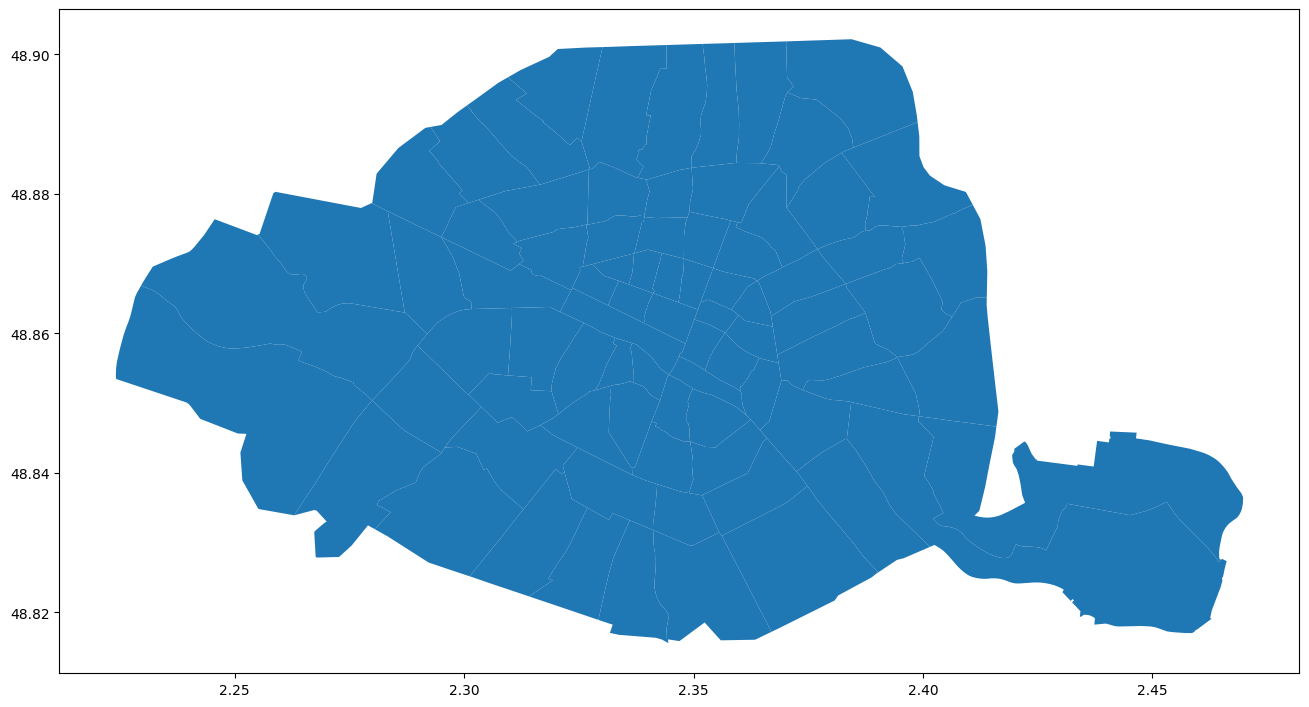

In [ ]:
gdf_quartier["geometry"].plot(figsize=(16, 16))

In [ ]:
gdf_addr_paris_1898 = geopandas.GeoDataFrame(
    ban_api_df, geometry=geopandas.points_from_xy(ban_api_df.lng, ban_api_df.lat))

In [ ]:
gdf_addr_paris_1898

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


nom_voie             type_voie  NUM  \
0                           BOILEAU               impasse    1   
1                          GOMBOUST                   rue    1   
2                              ORME                   rue    1   
3                   SAINTE-CHAPELLE                   rue    1   
4                  HÉGÉSIPPE MOREAU                   rue    1   
5                           GATBOIS               passage    1   
6                         FROMENTIN                   rue    1   
7                             JACOB                   rue    1   
8                        CHRISTIANI                   rue    1   
9                           BOULARD                   rue    1   
10                           ROLLIN                   rue    1   
11                        LOWENDALL                avenue    1   
12                             BUCI                   rue    1   
13                           NOLLET               passage    1   
14                         PICARDIE                   rue    1   
15                     POISSONNIERS               passage    1   
16                        MALAQUAIS                  quai    1   
17                     PHOTOGRAPHIE               impasse    1   
18                      TRAVERSIÈRE                   rue    1   
19                   SOPHIE GERMAIN                   rue    1   
20                      RONDONNEAUX                   rue    1   
21                     ARQUEBUSIERS                   rue    1   
22                         CHAPELLE                   rue    1   
23                        MEYERBEER                   rue    2   
24                            SUGER                   rue    2   
25                          BLONDEL                   rue    2   
26                            ANJOU                   rue    2   
27                     MÉNILMONTANT               impasse    2   
28                     SAINT-ROMAIN                   rue    2   
29                      JEAN COTTIN                   rue    2   
30                          LAUGIER               impasse    2   
31                            AFFRE                   rue    2   
32                          VALETTE                   rue    2   
33                          CHARLOT                   rue    2   
34                          GAUTHEY                   rue    2   
35                             SÈZE                   rue    2   
36                    SAINT-SAUVEUR                   rue    2   
37                       DEBROUSSES                   rue    2   
38         HOSPITALIÈRES-ST-GERVAIS                   rue    2   
39                            OBLIN                   rue    2   
40                        SAINTONGE                   rue    2   
41               ST-FRANÇOIS-XAVIER                 place    2   
42                         ORCHAMPT                   rue    2   
43                         SPONTINI                 villa    2   
44                           GANDON                ruelle    2   
45                      JEAN BOUTON               impasse    2   
46                         COLONNES                   rue    2   
47                            FÉROU                   rue    2   
48                  PORTES BLANCHES                   rue    3   
49                         MICHELET                   rue    3   
50                         QUINAULT                   rue    3   
51                         MATIGNON                avenue    3   
52                          MESSINE                square    3   
53                           POTEAU                   rue    3   
54                        LAS-CASES                   rue    3   
55                          SIMONET               passage    3   
56                      TROIS SŒURS               impasse    3   
57                          ANNIBAL                  cité    3   
58                      BATIGNOLLES                   rue    3   
59                             UZÈS                   rue    3   
6

###Gestion des systèmes de coordonnées et de projection

Rappel:
* Le système de coordonnées est la manière de définir la position d'un point sur la surface de la Terre.
* Le système de projection est la méthode pour projeter cette position sur une surface plane pour créer une carte.

In [ ]:
gdf_addr_paris_1898.crs = "EPSG:4326"
gdf_quartier.crs = "EPSG:4326"

gdf_addr_paris_1898.to_crs("EPSG:3857")
gdf_quartier.to_crs("EPSG:3857")

c_qu  c_quinsee                       l_qu  c_ar      n_sq_ar  \
n_sq_qu                                                                      
750000013.0  13.0  7510401.0                Saint-Merri   4.0  750000004.0   
750000016.0  16.0  7510404.0                 Notre-Dame   4.0  750000004.0   
750000028.0  28.0  7510704.0               Gros-Caillou   7.0  750000007.0   
750000041.0  41.0  7511101.0            Folie-Méricourt  11.0  750000011.0   
750000007.0   7.0  7510203.0                       Mail   2.0  750000002.0   
750000049.0  49.0  7511301.0                Salpêtrière  13.0  750000013.0   
750000008.0   8.0  7510204.0             Bonne-Nouvelle   2.0  750000002.0   
750000004.0   4.0  7510104.0              Place-Vendôme   1.0  750000001.0   
750000050.0  50.0  7511302.0                       Gare  13.0  750000013.0   
750000076.0  76.0  7511904.0                     Combat  19.0  750000019.0   
750000070.0  70.0  7511802.0               Clignancourt  18.0  750000018.0   
750000080.0  80.0  7512004.0                   Charonne  20.0  750000020.0   
750000071.0  71.0  7511803.0                Goutte-d'Or  18.0  750000018.0   
750000060.0  60.0  7511504.0                      Javel  15.0  750000015.0   
750000048.0  48.0  7511204.0              Quinze-Vingts  12.0  750000012.0   
750000027.0  27.0  7510703.0            Ecole-Militaire   7.0  750000007.0   
750000059.0  59.0  7511503.0                   Grenelle  15.0  750000015.0   
750000061.0  61.0  7511601.0                    Auteuil  16.0  750000016.0   
750000036.0  36.0  7510904.0               Rochechouart   9.0  750000009.0   
750000047.0  47.0  7511203.0                      Bercy  12.0  750000012.0   
750000002.0   2.0  7510102.0                     Halles   1.0  750000001.0   
750000019.0  19.0  7510503.0               Val-de-Grâce   5.0  750000005.0   
750000058.0  58.0  7511502.0                     Necker  15.0  750000015.0   
750000079.0  79.0  7512003.0              Père-Lachaise  20.0  750000020.0   
750000072.0  72.0  7511804.0                La Chapelle  18.0  750000018.0   
750000067.0  67.0  7511703.0                Batignolles  17.0  750000017.0   
750000026.0  26.0  7510702.0                  Invalides   7.0  750000007.0   
750000035.0  35.0  7510903.0        Faubourg-Montmartre   9.0  750000009.0   
750000005.0   5.0  7510201.0                    Gaillon   2.0  750000002.0   
750000075.0  75.0  7511903.0                   Amérique  19.0  750000019.0   
750000006.0   6.0  7510202.0                   Vivienne   2.0  750000002.0   
750000010.0  10.0  7510302.0             Enfants-Rouges   3.0  750000003.0   
750000024.0  24.0  7510604.0     Saint-Germain-des-Prés   6.0  750000006.0   
750000037.0  37.0  7511001.0      Saint-Vincent-de-Paul  10.0  750000010.0   
750000042.0  42.0  7511102.0             Saint-Ambroise  11.0  750000011.0   
750000045.0  45.0  7511201.0                    Bel-Air  12.0  750000012.0   
750000053.0  53.0  7511401.0               Montparnasse  14.0  750000014.0   
750000066.0  66.0  7511702.0         Plaine de Monceaux  17.0  750000017.0   
750000023.0  23.0  7510603.0      Notre-Dame-des-Champs   6.0  750000006.0   
750000055.0  55.0  7511403.0            Petit-Montrouge  14.0  750000014.0   
750000074.0  74.0  7511902.0            Pont-de-Flandre  19.0  750000019.0   
750000062.0  62.0  7511602.0                     Muette  16.0  750000016.0   
750000064.0  64.0  7511604.0                   Chaillot  16.0  750000016.0   
750000068.0  68.0  7511704.0                  Epinettes  17.0  750000017.0   
750000032.0  32.0  7510804.0                     Europe   8.0  750000008.0   
750000044.0  44.0  7511104.0          Sainte-Marguerite  11.0  750000011.0   
750000054.0  54.0  7511402.0         Parc-de-Montsouris  14.0  750000014.0   
750000057.0  57.0  7511501.0              Saint-Lambert  15.0  750000015.0   
750000009.0   9.0  7510301.0            Arts-et-Métiers   3.0  750000003.0   
750000011.0  11.0  7510303.0       

### Projection des adresses sur un fond de carte de Paris

<Axes: >

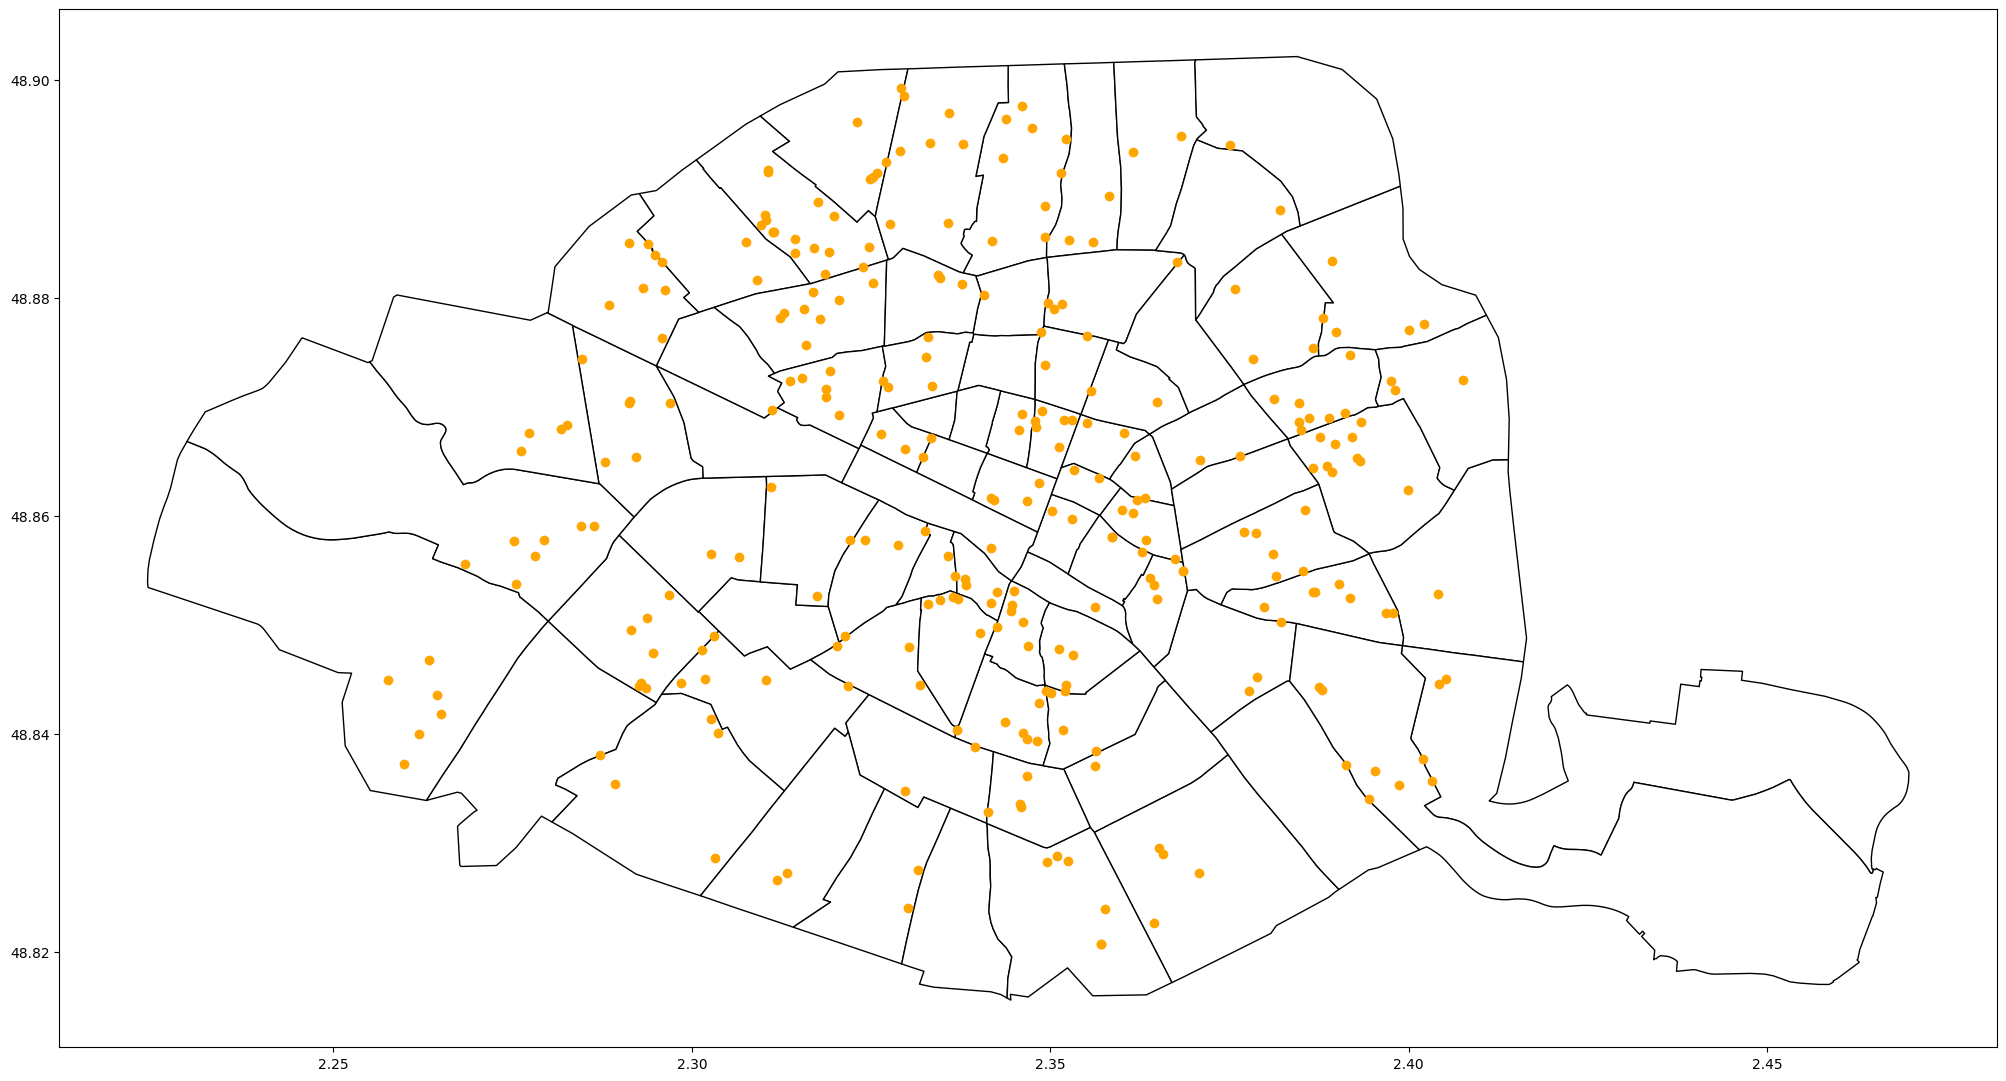

In [ ]:
ax = gdf_quartier.plot(figsize = (25, 22), color='white', edgecolor='black')

gdf_addr_paris_1898.plot(ax = ax, color='orange')

### Relations spatiales et jointures des données

Les relations spatiales sont définies par l'OGC comme des prédicats binaires (intersects, contains, within, equals, ...) entre les différents types de géométries (point, lignes, polygones).
Voir toutes les combinaisons possibles dans ce tableau : https://docs.safe.com/fme/html/FME_Desktop_Documentation/FME_Transformers/Transformers/spatialrelations.htm

In [ ]:
joined_df = geopandas.sjoin(
    gdf_addr_paris_1898,
    gdf_quartier,
    how='inner',
    predicate='intersects',
)
joined_df

<ipython-input-24-08c27083b6fb>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_df = geopandas.sjoin(


nom_voie             type_voie  NUM  \
1                          GOMBOUST                   rue    1   
4                  HÉGÉSIPPE MOREAU                   rue    1   
5                           GATBOIS               passage    1   
6                         FROMENTIN                   rue    1   
7                             JACOB                   rue    1   
8                        CHRISTIANI                   rue    1   
9                           BOULARD                   rue    1   
10                           ROLLIN                   rue    1   
11                        LOWENDALL                avenue    1   
12                             BUCI                   rue    1   
16                        MALAQUAIS                  quai    1   
18                      TRAVERSIÈRE                   rue    1   
19                   SOPHIE GERMAIN                   rue    1   
20                      RONDONNEAUX                   rue    1   
21                     ARQUEBUSIERS                   rue    1   
23                        MEYERBEER                   rue    2   
24                            SUGER                   rue    2   
25                          BLONDEL                   rue    2   
26                            ANJOU                   rue    2   
27                     MÉNILMONTANT               impasse    2   
28                     SAINT-ROMAIN                   rue    2   
29                      JEAN COTTIN                   rue    2   
31                            AFFRE                   rue    2   
32                          VALETTE                   rue    2   
33                          CHARLOT                   rue    2   
34                          GAUTHEY                   rue    2   
35                             SÈZE                   rue    2   
36                    SAINT-SAUVEUR                   rue    2   
37                       DEBROUSSES                   rue    2   
38         HOSPITALIÈRES-ST-GERVAIS                   rue    2   
40                        SAINTONGE                   rue    2   
42                         ORCHAMPT                   rue    2   
43                         SPONTINI                 villa    2   
45                      JEAN BOUTON               impasse    2   
46                         COLONNES                   rue    2   
47                            FÉROU                   rue    2   
48                  PORTES BLANCHES                   rue    3   
50                         QUINAULT                   rue    3   
51                         MATIGNON                avenue    3   
53                           POTEAU                   rue    3   
54                        LAS-CASES                   rue    3   
55                          SIMONET               passage    3   
56                      TROIS SŒURS               impasse    3   
57                          ANNIBAL                  cité    3   
58                      BATIGNOLLES                   rue    3   
59                             UZÈS                   rue    3   
60                        BISCORNET                   rue    3   
62   PRÊTRES St-GERMAIN-L'AUXERROIS                   rue    3   
63                        BOUCHARDY               passage    3   
65                          TLEMCEN               passage    3   
66                           MONCEY               passage    3   
67                             CURÉ               impasse    3   
68                           LAUZIN                   rue    3   
69                          VOUILLÉ                   rue    3   
70                         SALNEUVE                   rue    3   
71                        PÉTRAROUE                   rue    4   
72                           NATION                 place    4   
73                         CASCADES                   rue    4   
74                      RENDEZ-VOUS                   rue    4   
76                          THÉNARD                   rue    4   
7

In [ ]:
non_match_addr = geopandas.sjoin(
    gdf_addr_paris_1898,
    gdf_quartier,
    how='left',
    predicate='intersects',
)
non_match_addr

<ipython-input-25-729b3644a0cb>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  non_match_addr = geopandas.sjoin(


nom_voie             type_voie  NUM  \
0                           BOILEAU               impasse    1   
1                          GOMBOUST                   rue    1   
2                              ORME                   rue    1   
3                   SAINTE-CHAPELLE                   rue    1   
4                  HÉGÉSIPPE MOREAU                   rue    1   
5                           GATBOIS               passage    1   
6                         FROMENTIN                   rue    1   
7                             JACOB                   rue    1   
8                        CHRISTIANI                   rue    1   
9                           BOULARD                   rue    1   
10                           ROLLIN                   rue    1   
11                        LOWENDALL                avenue    1   
12                             BUCI                   rue    1   
13                           NOLLET               passage    1   
14                         PICARDIE                   rue    1   
15                     POISSONNIERS               passage    1   
16                        MALAQUAIS                  quai    1   
17                     PHOTOGRAPHIE               impasse    1   
18                      TRAVERSIÈRE                   rue    1   
19                   SOPHIE GERMAIN                   rue    1   
20                      RONDONNEAUX                   rue    1   
21                     ARQUEBUSIERS                   rue    1   
22                         CHAPELLE                   rue    1   
23                        MEYERBEER                   rue    2   
24                            SUGER                   rue    2   
25                          BLONDEL                   rue    2   
26                            ANJOU                   rue    2   
27                     MÉNILMONTANT               impasse    2   
28                     SAINT-ROMAIN                   rue    2   
29                      JEAN COTTIN                   rue    2   
30                          LAUGIER               impasse    2   
31                            AFFRE                   rue    2   
32                          VALETTE                   rue    2   
33                          CHARLOT                   rue    2   
34                          GAUTHEY                   rue    2   
35                             SÈZE                   rue    2   
36                    SAINT-SAUVEUR                   rue    2   
37                       DEBROUSSES                   rue    2   
38         HOSPITALIÈRES-ST-GERVAIS                   rue    2   
39                            OBLIN                   rue    2   
40                        SAINTONGE                   rue    2   
41               ST-FRANÇOIS-XAVIER                 place    2   
42                         ORCHAMPT                   rue    2   
43                         SPONTINI                 villa    2   
44                           GANDON                ruelle    2   
45                      JEAN BOUTON               impasse    2   
46                         COLONNES                   rue    2   
47                            FÉROU                   rue    2   
48                  PORTES BLANCHES                   rue    3   
49                         MICHELET                   rue    3   
50                         QUINAULT                   rue    3   
51                         MATIGNON                avenue    3   
52                          MESSINE                square    3   
53                           POTEAU                   rue    3   
54                        LAS-CASES                   rue    3   
55                          SIMONET               passage    3   
56                      TROIS SŒURS               impasse    3   
57                          ANNIBAL                  cité    3   
58                      BATIGNOLLES                   rue    3   
59                             UZÈS                   rue    3   
6

In [ ]:
non_match_addr.isnull().sum()

nom_voie           0
type_voie          0
NUM                0
PERS             148
ORG              644
STATUT           559
VILLE            140
Liste_imm          0
addr_complet       0
ban_query          0
lat              104
lng              104
score_resp       104
postcode_resp    104
label_resp       105
Unnamed: 15      673
geometry           0
n_sq_qu          104
c_qu             104
c_quinsee        104
l_qu             104
c_ar             104
n_sq_ar          104
perimetre        104
surface          104
dtype: int64

### Première analyse : combien d'adresses par quartier ?

In [ ]:
count_addr_per_quartier = joined_df.groupby(['n_sq_ar'],
    as_index=False,
)['addr_complet'].count()
count_addr_per_quartier.columns = ['n_sq_ar', 'count_addr']  # rename the column
count_addr_per_quartier

n_sq_ar  count_addr
0   750000001.0           9
1   750000002.0           8
2   750000003.0          11
3   750000004.0          11
4   750000005.0          20
5   750000006.0          15
6   750000007.0           8
7   750000008.0          15
8   750000009.0          10
9   750000010.0           8
10  750000011.0          15
11  750000012.0          13
12  750000013.0          15
13  750000014.0           6
14  750000015.0          18
15  750000016.0          23
16  750000017.0          33
17  750000018.0          21
18  750000019.0          10
19  750000020.0          22

**Jointure à gauche des tableurs : nombre de point par quartier**

In [ ]:
addr_count_quartier = gdf_quartier.merge(
    count_addr_per_quartier,
    on='n_sq_ar',
    how='left',
)
addr_count_quartier.head()

c_qu  c_quinsee             l_qu  c_ar      n_sq_ar    perimetre  \
0  13.0  7510401.0      Saint-Merri   4.0  750000004.0  2346.004687   
1  16.0  7510404.0       Notre-Dame   4.0  750000004.0  3283.163371   
2  28.0  7510704.0     Gros-Caillou   7.0  750000007.0  4720.994373   
3  41.0  7511101.0  Folie-Méricourt  11.0  750000011.0  3724.352694   
4   7.0  7510203.0             Mail   2.0  750000002.0  2179.153605   

        surface                                           geometry  count_addr  
0  3.130404e+05  POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...          11  
1  3.782522e+05  POLYGON ((2.36131 48.84858, 2.36151 48.84823, ...          11  
2  1.381893e+06  POLYGON ((2.30954 48.85396, 2.30646 48.85413, ...           8  
3  7.257525e+05  POLYGON ((2.3701 48.86376, 2.3669 48.86246, 2....          15  
4  2.781426e+05  POLYGON ((2.34684 48.86491, 2.34668 48.86443, ...           8

In [ ]:
addr_count_quartier.isnull().sum()

c_qu          0
c_quinsee     0
l_qu          0
c_ar          0
n_sq_ar       0
perimetre     0
surface       0
geometry      0
count_addr    0
dtype: int64

In [ ]:
addr_count_quartier['count_addr'].fillna(
    0,
    inplace=True,
)
# fill in missing's with 0, valid in this case.

<ipython-input-35-ea635828c20c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  addr_count_quartier['count_addr'].fillna(


###Cartographie thématique (carte choroplèthe)

<Axes: >

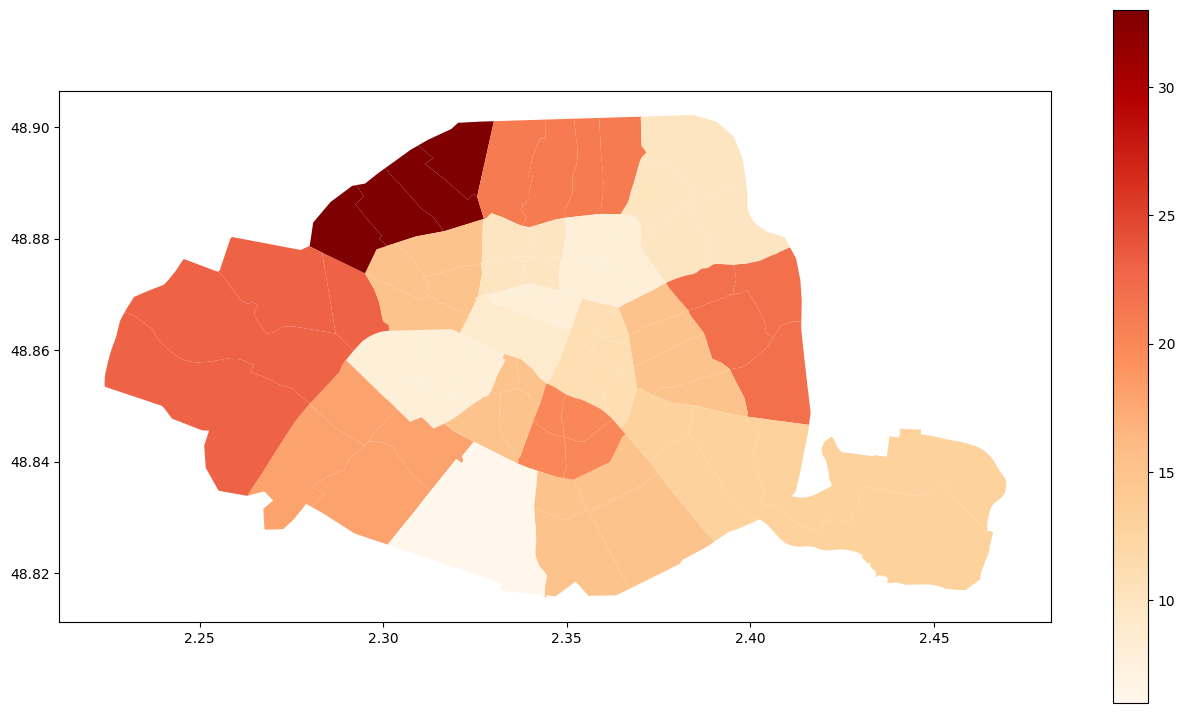

In [ ]:
addr_count_quartier.plot(
    column='count_addr',
    figsize=(16, 9),
    cmap='OrRd', #cmap='magma'
    legend=True,
)

# schema de couleurs : https://matplotlib.org/2.0.2/users/colormaps.html

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.0 MB/s eta 0:00:00


<Axes: >

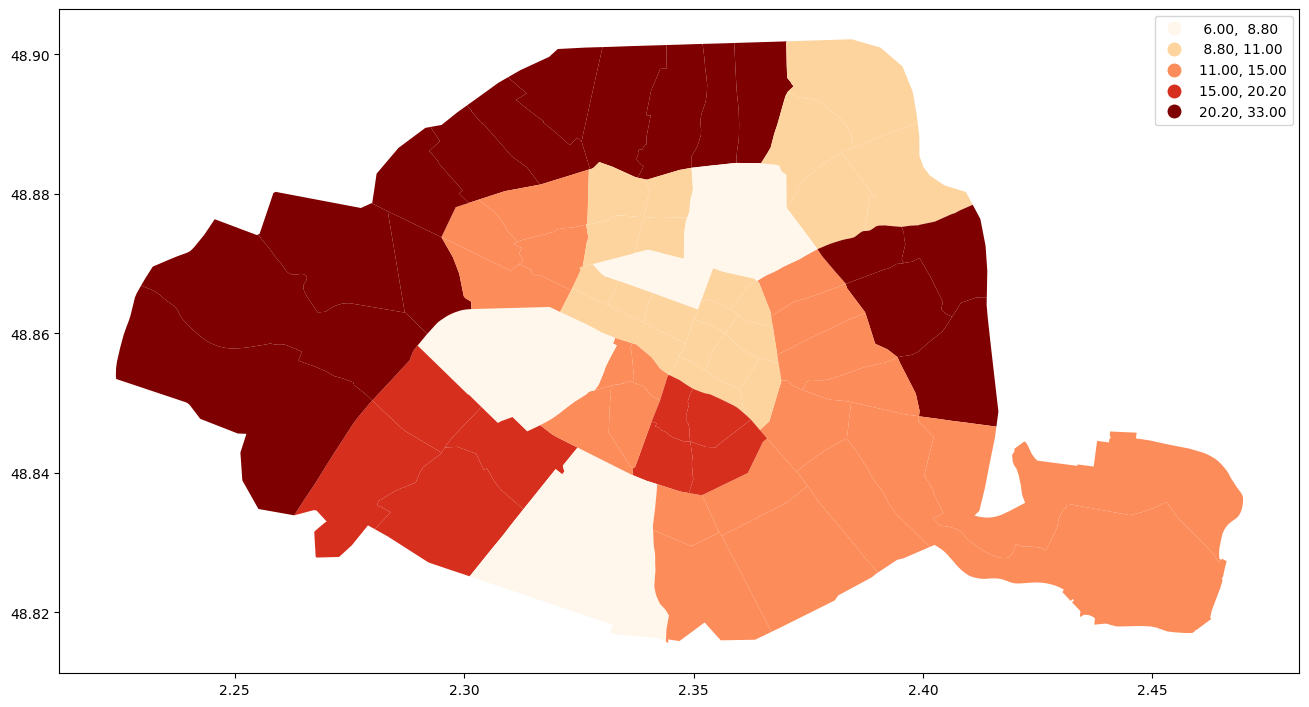

In [ ]:
addr_count_quartier.plot(column='count_addr', scheme='Quantiles', k=5, figsize=(16, 9), cmap='OrRd', legend=True)

In [ ]:
addr_count_quartier['count_addr'].describe()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

count    80.000000
mean     14.550000
std       6.571708
min       6.000000
25%       9.750000
50%      14.000000
75%      18.500000
max      33.000000
Name: count_addr, dtype: float64

###Méthodes de classification

*   Quantiles
*   BoxPlot
*   EqualInterval
*   NaturalBreaks
*   Percentiles
*   *Jenks
*   StdMean



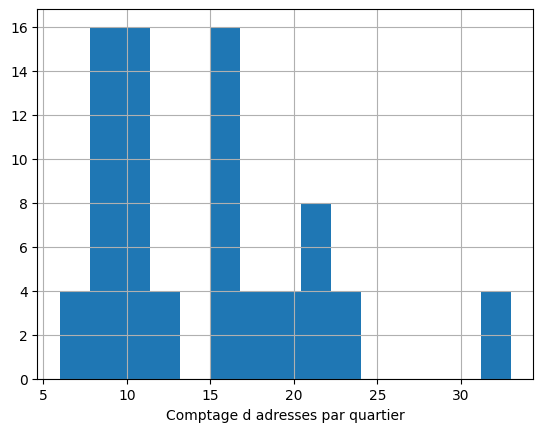

In [ ]:
import matplotlib.pyplot as plt

addr_count_quartier['count_addr'].hist(bins=15)
plt.xlabel('Comptage d adresses par quartier')
plt.show()

**EQUAL INTERVAL** divise les données en classes de taille égale (par exemple, 0-10, 10-20, 20-30, etc.) et fonctionne mieux avec des données qui sont généralement réparties sur toute la plage.

ATTENTION : évitez l'intervalle égal si vos données tendent à une extrémité ou si vous avez une ou deux valeurs aberrantes vraiment importantes.

In [ ]:
import mapclassify

mapclassify.EqualInterval(addr_count_quartier.count_addr, k=5)

EqualInterval

   Interval      Count
----------------------
[ 6.00, 11.40] |    36
(11.40, 16.80] |    20
(16.80, 22.20] |    16
(22.20, 27.60] |     4
(27.60, 33.00] |     4

**QUANTILES** essaie de classer le même nombre d'observations dans chacune des N classes. En d'autres termes, cette méthode essaie d'organiser les groupes de façon à ce qu'ils aient la même quantité. Le problème avec les quantiles est que vous pouvez vous retrouver avec des classes qui ont des plages numériques très différentes (par exemple, 1-4, 4-9, 9-250).

In [ ]:
mapclassify.Quantiles(addr_count_quartier.count_addr, k=5)

Quantiles

   Interval      Count
----------------------
[ 6.00,  8.80] |    16
( 8.80, 11.00] |    20
(11.00, 15.00] |    20
(15.00, 20.20] |     8
(20.20, 33.00] |    16

**NATURAL BREAKS (Jenks)** organise chaque groupe de manière à ce qu'il y ait moins de variation dans chaque classe ou nuance.

est une sorte de schéma de classification "optimal" qui trouve les ruptures de classe qui minimiseront la variance intra-classe et maximiseront les différences entre les classes. Un inconvénient de cette approche est que chaque ensemble de données génère une solution de classification unique, et si vous avez besoin de faire des comparaisons entre les cartes, comme dans un atlas ou une série (par exemple, une carte pour 1980, 1990, 2000), vous voudrez peut-être utiliser un seul schéma qui peut être appliqué à toutes les cartes.



In [ ]:
mapclassify.NaturalBreaks(addr_count_quartier.count_addr)

NaturalBreaks

   Interval      Count
----------------------
[ 6.00,  9.00] |    20
( 9.00, 13.00] |    20
(13.00, 18.00] |    20
(18.00, 23.00] |    16
(23.00, 33.00] |     4

Pour plus d'informations : https://gisgeography.com/choropleth-maps-data-classification/

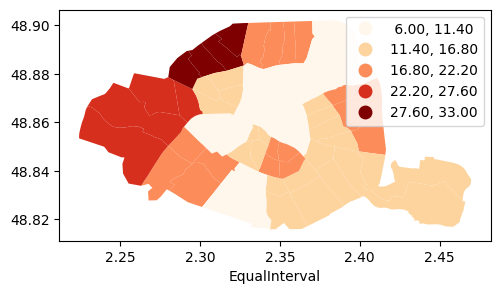

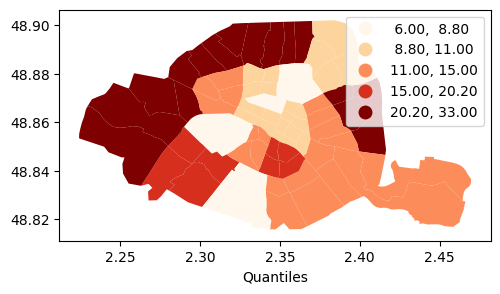

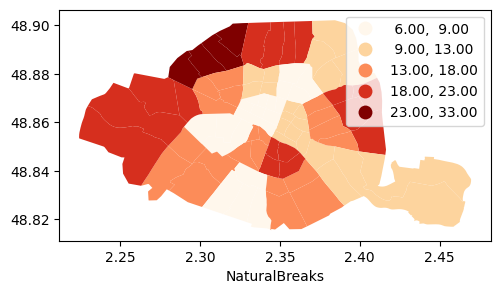

In [ ]:
addr_count_quartier.plot(column='count_addr', scheme='EqualInterval', k=5, figsize=(6, 3), cmap='OrRd', legend=True)
plt.xlabel('EqualInterval')
plt.show()

addr_count_quartier.plot(column='count_addr', scheme='Quantiles', k=5, figsize=(6, 3), cmap='OrRd', legend=True)
plt.xlabel('Quantiles')
plt.show()

addr_count_quartier.plot(column='count_addr', scheme='NaturalBreaks', k=5, figsize=(6, 3), cmap='OrRd', legend=True )
plt.xlabel('NaturalBreaks')
plt.show()


In [ ]:
addr_count_quartier.explore("count_addr", legend=True)

In [ ]:
bp = mapclassify.Quantiles(addr_count_quartier.count_addr)
bp

Quantiles

   Interval      Count
----------------------
[ 6.00,  8.80] |    16
( 8.80, 11.00] |    20
(11.00, 15.00] |    20
(15.00, 20.20] |     8
(20.20, 33.00] |    16

### Une autre analyse : identifier les 10 principaux propriétaires

In [ ]:
len(gdf_addr_paris_1898)

338

In [ ]:
gdf_addr_paris_1898

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


nom_voie  type_voie  NUM                     PERS  \
31110                 FROCHOT        rue    6                    Jauze   
65618             ROI D'ALGER        rue    5                   Bellet   
27797   FAUBOURG POISSONNIÈRE        rue    6                     Jean   
62975                RANELAGH        rue   16                    Fabre   
48494                  MERLIN        rue   26                    Bigot   
48712               MEYERBEER        rue    2                   Arthus   
52878                  NATION      place   10                 Chevrier   
56994               PAVILLONS        rue   22                   Fricou   
1676                AMANDIERS        rue   80                    Morin   
32989      GODEFROY-CAVAIGNAC        rue   11                      NaN   
75580                 THOLOZÉ        rue   25                    Peyre   
71226        SAINTE-CATHERINE    passage    8                   Renaud   
44880                    LYON        rue   11                    Puard   
8292              BILLANCOURT        rue   21                Pelletier   
16907                  CHÉROY        rue    5                  Demange   
41064               LAPÉROUSE        rue   48                      NaN   
12464               CAMBRONNE      place  119                  Tillier   
31666                  GARDES        rue    5                  Boileau   
22453              DEBELLEYME        rue   15                 Dejaiffe   
74590                 TÉHÉRAN        rue   23                      NaN   
52818                  NAPLES        rue    5                      NaN   
48325            MÉNILMONTANT        rue   65                   Gilles   
60647         PORTES BLANCHES        rue    3                      NaN   
42513                LEGENDRE        rue  157                  Pilleux   
8973                  BOILEAU    impasse    1                  Soulard   
68630            SAINT-HONORÉ    cloître   13                      NaN   
2730                  AQUEDUC        rue   20                      NaN   
15074               CHARENTON        rue  303                   Fourel   
50540              MONTGALLET    passage   34                   Fortin   
17589          CLAUDE BERNARD        rue   25                 Ressejac   
11077                BRETAGNE        rue   33                   Savart   
19149                COMMERCE        rue   89                 Beaufils   
48986                MICHELET        rue    3       Institut de Chimie   
62440                QUINAULT        rue    3                  Lebigot   
57650               PÉRICHAUX     chemin   15                 Métivier   
58307               PÉTRAROUE        rue    4                 Maillard   
81296                VILLETTE        rue   55                  Gaumont   
68839            SAINT-HONORÉ        rue  348                  Pierson   
79169               VAUOUELIN        rue  294                      NaN   
69414             SAINT-MANDE     avenue   63                      NaN   
70636              SAINT-ROCH        rue   19                  Raymond   
25734                  ÉCOLES        rue   17                  Baillet   
33097                GOMBOUST        rue    1                      NaN   
1586                AMANDIERS    passage    7                   Renard   
17996                    CLER        rue   44                Delaugère   
8820                  BLONDEL        rue    9                      NaN   
17598          CLAUDE BERNARD        rue   43                   Pitiot   
18007                   CLÉRY        rue   15                      NaN   
74114                   SUGER        rue    2                      NaN   
74546               TANNERIES        rue   14         Dufaur d’Allaric   
42445                LEGENDRE        rue    7                   Coumes   
16288               CHATELAIN        rue   13                  Carrier   
60765              POT DE FER        rue   13                      NaN   
22652                DELA

In [ ]:
# Compter le nombre de propriétés par propriétaire
proprietaire_count = gdf_addr_paris_1898['PERS'].value_counts()
proprietaire_count


PERS
Leroy                      3
Duval                      2
Bisson                     2
Vignon                     2
Maire                      2
Chancel                    1
Guéret                     1
Pujos de Coudray           1
Martin                     1
Marotte                    1
Haranger                   1
Teysset                    1
Belland                    1
Locherot                   1
Baurès                     1
Dolié                      1
Chasle                     1
Richard                    1
Gauthier                   1
Deflers                    1
Lahaye (de)                1
Grandsire                  1
Fouillade                  1
Paul                       1
Juillard                   1
Cuxac                      1
Deville                    1
Fournier                   1
Renaudot                   1
Meunier                    1
Faure-Beaulieu             1
Dufour                     1
Guidat                     1
Charbey                    1
Turneyssen                 1
Aléonard-Martin            1
Rigault                    1
Bouline                    1
Michel                     1
Delamarre                  1
Genty                      1
Roux                       1
Chataignié                 1
Thémericourt               1
Nansot                     1
Mazet                      1
Toutant                    1
Joly                       1
Hautefeuille               1
Dutaut                     1
Adam                       1
Lagache                    1
Varin                      1
Debray                     1
Gaudy                      1
Souchard                   1
Rigaud                     1
Guigon                     1
Saget                      1
Paulin                     1
Marvy                      1
Julie                      1
Tiberg                     1
Courtade                   1
Girerd                     1
Gault                      1
Jauze                      1
Didiot                     1
Hulot                      1
Fabien                     1
Trouet                     1
Terrasse                   1
Delavigne                  1
Guichard                   1
Lepaul                     1
Bessard                    1
Cluzeau                    1
Lacasse                    1
Lapariat                   1
Hagneaux                   1
Laforcade                  1
Lecat                      1
Nicoud                     1
Combe                      1
Genet                      1
Tillard                    1
Paillard                   1
Lieutar                    1
Berthaud                   1
Hauret                     1
Teissèdre                  1
Duponchelle                1
Dupuy                      1
Heine                      1
Hérouart                   1
Courtin                    1
Calzonio                   1
Compagnon                  1
Cambacérès                 1
Hyppolite                  1
Danicourt                  1
Engerand                   1
Favart                     1
Lowenbach                  1
Dubois                     1
Damia                      1
Tarout                     1
Lepert                     1
Tourseillier               1
Bombois                    1
Viallard                   1
Graux                      1
Vieillard                  1
Marie                      1
Lesieur                    1
Tourtel                    1
Sallé                      1
Pharamond                  1
Chardon                    1
Bonvalot                   1
De Baëque                  1
et                         1
Cahen                      1
Fanet                      1
Hanquet                    1
Fonce                      1
Guary                      1
Lecoq                      1
Baudoin                    1
Voisy                      1
Bulle                      1
Huaux                      1
Milon-Poucheux             1
Bocquet                    1
Delaugère                  1
Pitiot                     1
Dufaur d’Allaric           1
Coumes                

In [ ]:
# Compter le nombre de propriétés(org) par propriétaire
org_prop_count = gdf_addr_paris_1898['ORG'].value_counts()
org_prop_count

ORG
Ville de Paris                           2
Constr                                   1
Sté des Métaux                           1
Cie Ass. Vie « LaFoncière »              1
Gentil et Cogerdon                       1
Semselle St-Maurice                      1
Asile Ste-Anne                           1
Cie Gle des Petites Voitures de Paris    1
Const                                    1
Sigogne La Ravaudière                    1
Braconnier et Taillardat                 1
Sté Immobilière Paris                    1
Name: count, dtype: int64

In [ ]:
# Afficher les propriétaires avec le plus de propriétés
top_proprietaires = proprietaire_count.head(10).index  # afficher les 10 premiers par exemple
print(top_proprietaires)


Index(['Leroy', 'Duval', 'Bisson', 'Vignon', 'Maire', 'Chancel', 'Guéret',
       'Pujos de Coudray', 'Martin', 'Marotte'],
      dtype='object', name='PERS')


In [ ]:
gdf_addr_paris_1898_top_prop = gdf_addr_paris_1898[gdf_addr_paris_1898['PERS'].isin(top_proprietaires)]

In [ ]:
gdf_addr_paris_1898_top_prop

nom_voie type_voie  NUM              PERS  ORG STATUT  \
75604                 THOREL       rue    7             Maire  NaN    NaN   
22699             DELARUELLE   passage   15             Leroy  NaN    NaN   
72769                SENTIER       rue   18             Duval  NaN    NaN   
28932               FÉLICITÉ       rue    9             Leroy  NaN    NaN   
14799                 CHAPPE       rue   23            Vignon  NaN    NaN   
38770         JULIEN LACROIX       rue   74            Vignon  NaN    NaN   
81576                VINEUSE       rue    7             Duval  NaN    NaN   
33068        GODOT DE MAUROY       rue   28             Leroy  NaN    Vve   
16512       CHAUSSÉE D'ANTIN       rue   58  Pujos de Coudray  NaN    Vve   
13708               CERISAIE       rue   20            Martin  NaN    Vve   
72107                SAUVAGE       rue   18           Marotte  NaN    NaN   
12263                 CALAIS       rue   15            Guéret  NaN    NaN   
75287                THÉNARD       rue    4           Chancel  NaN    NaN   
28610  FAUBOURG SAINT-MARTIN       rue  257            Bisson  NaN    NaN   
11487               BROCHANT       rue   17            Bisson  NaN    Mme   
49647                MONCEAU       rue   90             Maire  NaN    NaN   

                VILLE Liste_imm                   addr_complet  \
75604           Paris     ['7']                   7 rue THOREL   
22699           Paris    ['15']          15 passage DELARUELLE   
72769           Paris    ['18']                 18 rue SENTIER   
28932     Montmorency     ['9']                 9 rue FÉLICITÉ   
14799           Paris    ['23']                  23 rue CHAPPE   
38770           Paris    ['74']          74 rue JULIEN LACROIX   
81576           Paris     ['7']                  7 rue VINEUSE   
33068           Paris    ['28']         28 rue GODOT DE MAUROY   
16512  Chaussée Antin    ['58']        58 rue CHAUSSÉE D'ANTIN   
13708           Paris    ['20']                20 rue CERISAIE   
72107           Paris    ['18']                 18 rue SAUVAGE   
12263           Paris    ['15']                  15 rue CALAIS   
75287           Paris     ['4']                  4 rue THÉNARD   
28610           Paris   ['257']  257 rue FAUBOURG SAINT-MARTIN   
11487           Paris    ['17']                17 rue BROCHANT   
49647           Paris    ['90']                 90 rue MONCEAU   

                                               ban_query        lat       lng  \
75604  https://api-adresse.data.gouv.fr/search/?q=7+r...  48.869615  2.348910   
22699  https://api-adresse.data.gouv.fr/search/?q=15+...  48.852455  2.391849   
72769  https://api-adresse.data.gouv.fr/search/?q=18+...  48.869346  2.346044   
28932  https://api-adresse.data.gouv.fr/search/?q=9+r...  48.886663  2.309651   
14799  https://api-adresse.data.gouv.fr/search/?q=23+...  48.885281  2.341852   
38770  https://api-adresse.data.gouv.fr/search/?q=74+...  48.870361  2.384651   
81576  https://api-adresse.data.gouv.fr/search/?q=7+r...  48.859047  2.284485   
33068  https://api-adresse.data.gouv.fr/search/?q=28+...  48.871840  2.327335   
16512  https://api-adresse.data.gouv.fr/search/?q=58+...  48.874621  2.332680   
13708  https://api-adresse.data.gouv.fr/search/?q=20+...  48.852395  2.364823   
72107  https://api-adresse.data.gouv.fr/search/?q=18+...        NaN       NaN   
12263  https://api-adresse.data.gouv.fr/search/?q=15+...        NaN       NaN   
75287  https://api-adresse.data.gouv.fr/search/?q=4+r...  48.850319  2.346158   
28610  https://api-adresse.data.gouv.fr/search/?q=257...  48.883277  2.367624   
11487  https://api-adresse.data.gouv.fr/search/?q=17+...  48.888823  2.317626   
49647  https://api-adresse.data.gouv.fr/search/?q=90+...  48.880535  2.316840   

       score_resp postcode_resp                                    label_resp  \
75604    0.962239         75002                      7 Rue Thorel 75002 Paris   
22699    0.438582         75011                

<Axes: >

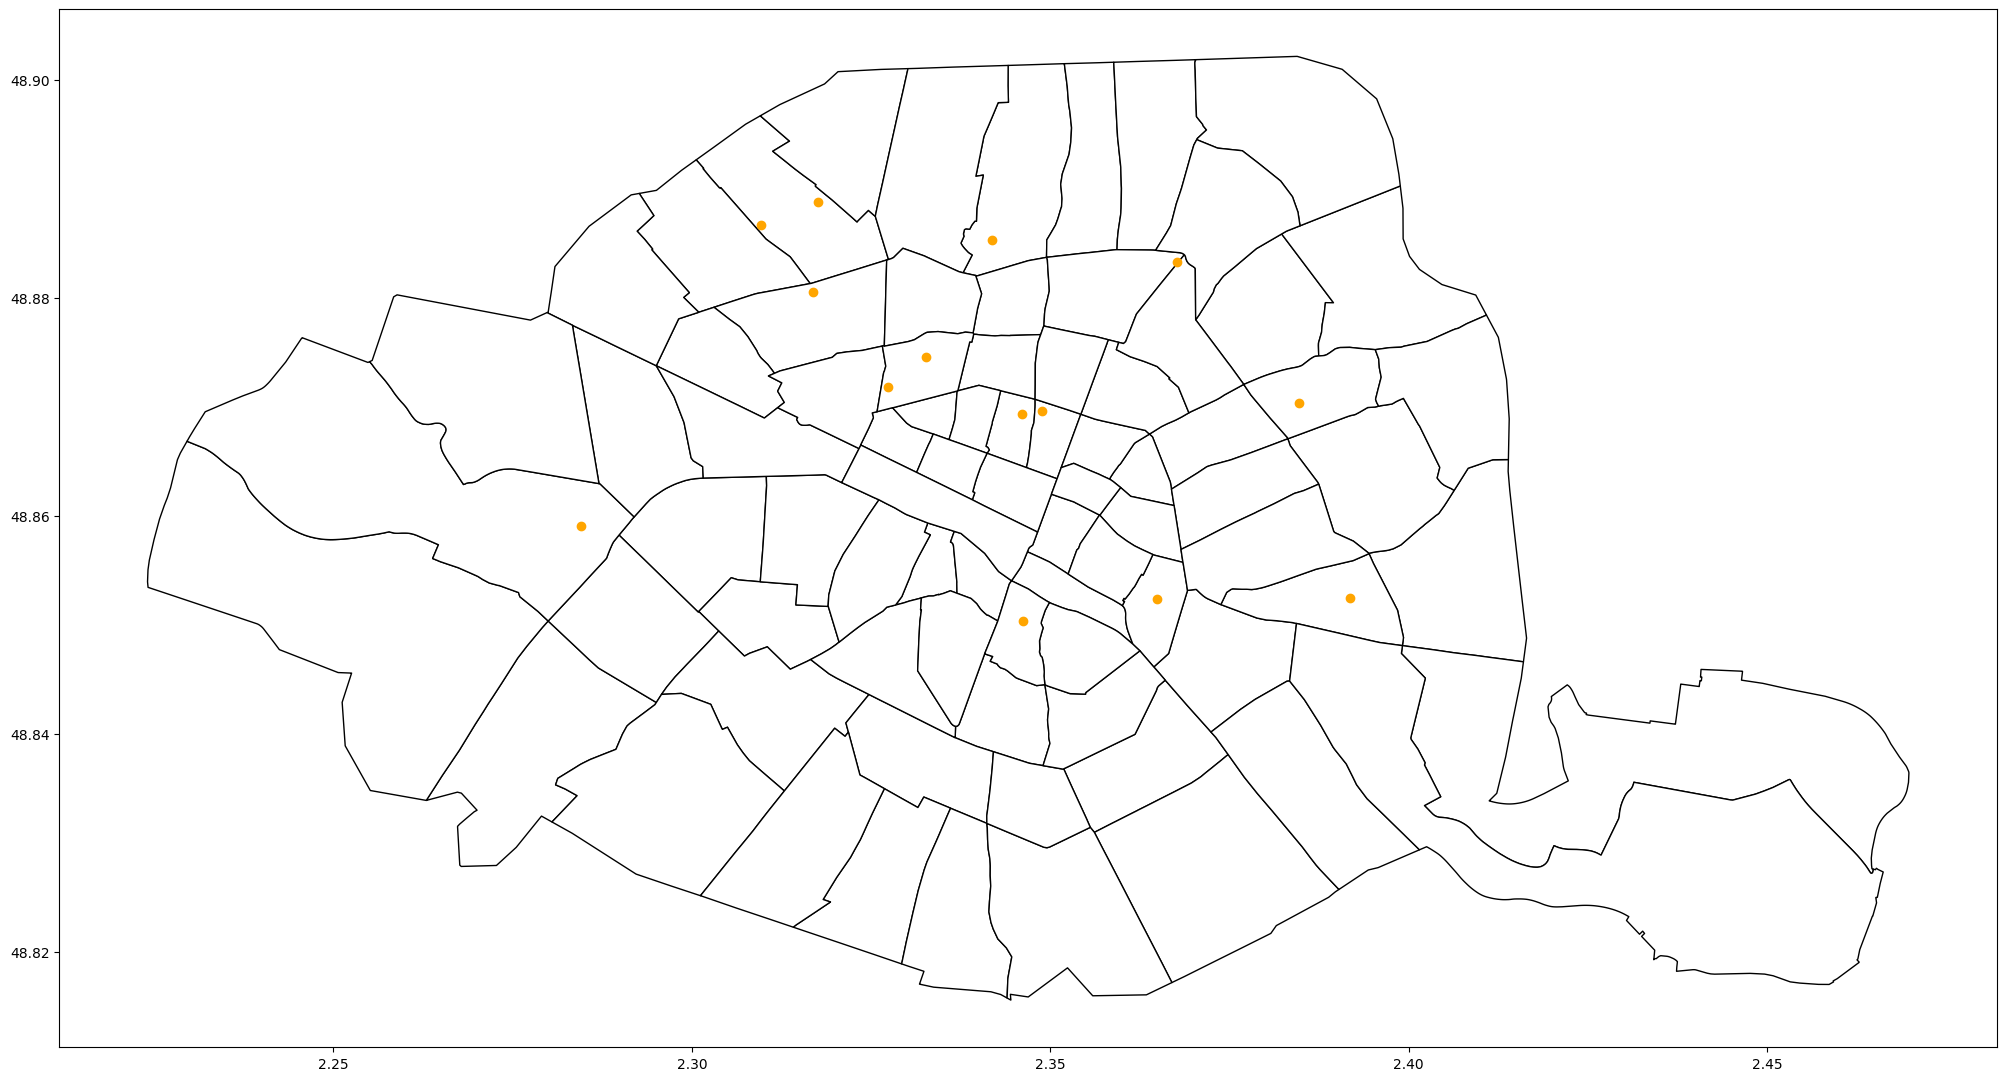

In [ ]:
ax = gdf_quartier.plot(figsize = (25, 22), color='white', edgecolor='black')

gdf_addr_paris_1898_top_prop.plot(ax = ax, color='orange')

- faire jointure par adressee 'texte' avec 1903 et faire boolean pour signaler changement de prop,
- count les points addr dans le polygons dont le boolean "a changé"
- count groupé par adresse du nombre de propriétaires suppossemenet différents, nouvelle colonne count prop diffrents
- sum du count point addr dans polygon quartier puis carto thématique